<a href="https://colab.research.google.com/github/ttoutlook/Colab-TensorFlow/blob/master/TensorHub_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pylab as plt

!pip install -q tf-nightly-gpu-2.0-preview
import tensorflow as tf

!pip install -q tensorflow_hub
import tensorflow_hub as hub

from tensorflow.keras import layers

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [0]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

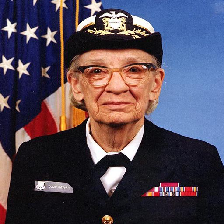

In [5]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [6]:
grace_hopper = np.array(grace_hopper) / 255.0
grace_hopper.shape

(224, 224, 3)

In [7]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

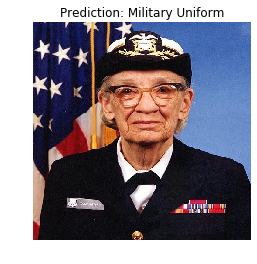

In [11]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [12]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


In [13]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [15]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [16]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'banana', 'coral fungus', 'artichoke', 'daisy', 'daisy',
       'daisy', 'daisy', 'rapeseed', 'rapeseed', 'rapeseed', 'bee',
       'daisy', 'daisy', 'daisy', 'feather boa', 'ski', 'ant',
       'picket fence', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'hummingbird', 'velvet', 'daisy', 'bee', 'wool',
       'buckeye', 'daisy'], dtype='<U30')

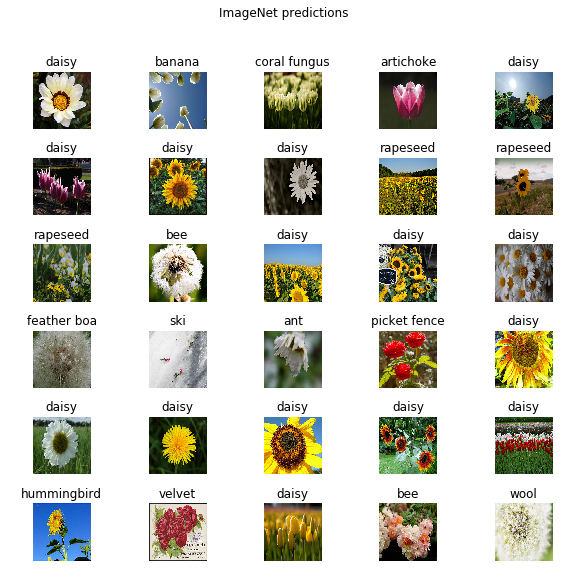

In [17]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [0]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [19]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=(224,224,3))
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch)

tf.Tensor(
[[0.         0.7633904  0.         ... 0.01780227 0.         0.        ]
 [0.         0.         0.08648215 ... 0.         1.8673874  0.        ]
 [0.         0.91797096 0.         ... 0.3440585  0.03008786 0.        ]
 ...
 [0.         0.         0.04138733 ... 0.02592367 0.         1.2685504 ]
 [0.         0.7661235  0.         ... 0.08185951 0.37248647 0.        ]
 [0.         1.2443622  0.         ... 0.         0.85164136 0.02718635]], shape=(32, 1280), dtype=float32)


In [0]:
feature_extractor_layer.trainable = False

In [21]:
# attach a classificaiton head
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(image_data.num_classes,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
predictions = model(image_batch)

In [23]:
predictions

<tf.Tensor: id=21707, shape=(32, 5), dtype=float32, numpy=
array([[0.1836037 , 0.4201315 , 0.09241455, 0.19485354, 0.10899664],
       [0.22494619, 0.27396885, 0.22908145, 0.09344799, 0.17855549],
       [0.4920588 , 0.21489589, 0.07863221, 0.13115108, 0.08326197],
       [0.31710404, 0.4426061 , 0.04837867, 0.03440307, 0.15750806],
       [0.32358998, 0.22765294, 0.1278684 , 0.19224334, 0.12864535],
       [0.6709191 , 0.18011825, 0.09437875, 0.02929512, 0.02528869],
       [0.47427574, 0.25945193, 0.05154613, 0.14653867, 0.06818751],
       [0.5368273 , 0.23414002, 0.03591484, 0.14724088, 0.04587689],
       [0.23177907, 0.11670196, 0.15939331, 0.18445973, 0.3076659 ],
       [0.4346608 , 0.06197223, 0.12324115, 0.12024208, 0.25988376],
       [0.29557973, 0.05687741, 0.14481568, 0.15230933, 0.35041785],
       [0.5665323 , 0.12568708, 0.06058631, 0.10052443, 0.14666985],
       [0.2676681 , 0.10852014, 0.05301568, 0.32886204, 0.24193394],
       [0.5150554 , 0.11042131, 0.11954974, 

In [0]:
# train the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

In [32]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit(image_data, epochs=2,
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats_callback])

Epoch 1/2
115/115 [==============================] - 17s 145ms/step - loss: 0.8442 - accuracy: 0.8438
Epoch 2/2
115/115 [==============================] - 16s 139ms/step - loss: 0.5066 - accuracy: 0.7812


In [34]:
image_data.samples

3670

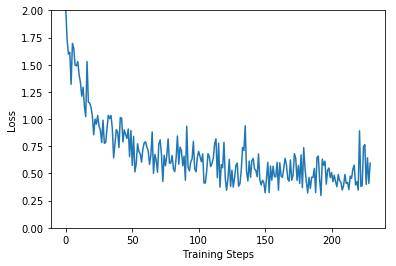

In [35]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Training Steps')
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

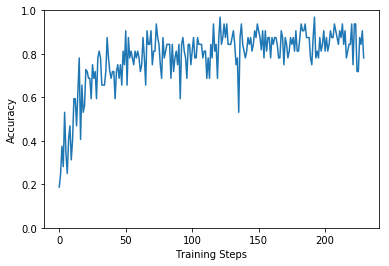

In [36]:
plt.figure()
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')
plt.ylim([0, 1])
plt.plot(batch_stats_callback.batch_acc)

In [37]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [0]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [0]:
label_id = np.argmax(label_batch, axis=-1)

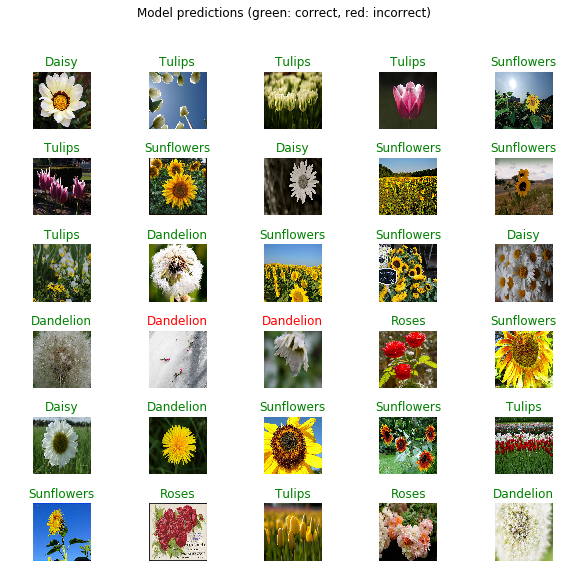

In [40]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")